#  DSC540-T302 Data Preparation  #

## Project Milestone 3 ##

### Saravanan Janarthanan ###

---------

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

import requests

In [2]:
web_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S&P_500_component_stocks'

# Fetch the HTML content of the webpage
response = requests.get(web_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
tables = soup.find_all('table')

In [3]:
len(tables)

2

In [4]:
wiki_tables = soup.find("table", {"class": "wikitable sortable"})

In [5]:
th_elements = wiki_tables.find_all('th')

In [6]:
tables_hdr = [cell.text.strip() for cell in th_elements]

In [7]:
tables_hdr

['Symbol',
 'Security',
 'GICS Sector',
 'GICS Sub-Industry',
 'Headquarters Location',
 'Date added',
 'CIK',
 'Founded']

In [8]:
# Reteieve all the TR tags 
rows = wiki_tables.find_all('tr')

# Declare a list to hold all the row data of the table
temp_lst = []

for row in rows:
    # filter all the TD,  tags 
    cells = row.find_all(['td'])
        
    # strip other values and retrieve only the tag text values
    row_data = [cell.text.strip() for cell in cells]
    temp_lst.append(row_data)

In [9]:
web_df = pd.DataFrame(temp_lst,  columns=tables_hdr)

web_df.head()

In [10]:
web_df.tail()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,0001524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,0001041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,0000877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,0001136869,1927
502,ZTS,Zoetis,Health Care,Pharmaceuticals,"Parsippany, New Jersey",2013-06-21,0001555280,1952


------
#### Replace Headers ####

- Replace 'Security'  with 'Company Name'
- Replace 'CIK'  with 'Central Index Key'
- Replace 'Founded'  with 'Year Founded'

In [11]:
tables_hdr[1] = 'Company Name'
tables_hdr[6] = 'Central Index Key'
tables_hdr[7] = 'Year Founded'

In [12]:
web_df.columns = tables_hdr

In [13]:
web_df.head()

,Symbol,Company Name,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,Central Index Key,Year Founded
0,None,None,None,None,None,None,None,None
1,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,0000066740,1902
2,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,0000091142,1916
3,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,0000001800,1888
4,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)


----
#### Remove bad Data ####
Remove rows that has no value
-  Remove the first row that has no value  ' None'

In [14]:
# Drop row at index position 1
web_df = web_df.drop(web_df.index[0])

web_df.head()

,Symbol,Company Name,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,Central Index Key,Year Founded
1,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,0000066740,1902
2,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,0000091142,1916
3,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,0000001800,1888
4,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
5,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989


----
#### Format Data ####
Year founded column has year value. some of the rows has other info appended
-  Trim those value appended after year value.  Year is 4 char in length,  hence slice the characters after 4 characters

In [15]:
web_df['Year Founded'] = web_df['Year Founded'].str[:4]

In [16]:
web_df.head()

,Symbol,Company Name,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,Central Index Key,Year Founded
1,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,0000066740,1902
2,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,0000091142,1916
3,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,0000001800,1888
4,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,0001551152,2013
5,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989


----
#### Find Outliers ####
Use the "Year Founded" column to find outliers of companies founded in previous century

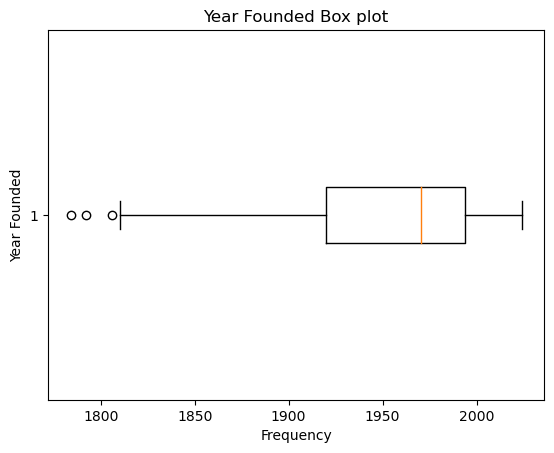

In [17]:
web_df['Year Founded'] = web_df['Year Founded'].astype(int)

import matplotlib.pyplot as plt
plt.boxplot(web_df['Year Founded'], vert=False, meanline=True)
plt.ylabel('Year Founded')
plt.xlabel('Frequency')
plt.title('Year Founded Box plot')
plt.show()

In [18]:
web_df['Year Founded'].describe()

count     502.000000
mean     1955.402390
std        48.948927
min      1784.000000
25%      1920.000000
50%      1970.500000
75%      1994.000000
max      2024.000000
Name: Year Founded, dtype: float64

In [19]:
summary = web_df['Year Founded'].describe(percentiles=[0, .25, .5, .75, 1])

In [20]:
summary

count     502.000000
mean     1955.402390
std        48.948927
min      1784.000000
0%       1784.000000
25%      1920.000000
50%      1970.500000
75%      1994.000000
100%     2024.000000
max      2024.000000
Name: Year Founded, dtype: float64

In [21]:
# Find outliers
yr_found_df = web_df['Year Founded']
q1 = 1920
q3 = 1994
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = yr_found_df[(yr_found_df < lower_bound) | (yr_found_df > upper_bound)]

In [22]:
print("Lower Bound Value : ", lower_bound , "   Upper Bound Value : ", upper_bound)
print(" Outlier values are \n", outliers)     

Lower Bound Value :  1809.0    Upper Bound Value :  2105.0
 Outlier values are 
 59     1784
120    1806
426    1792
Name: Year Founded, dtype: int32


In [23]:
web_df['GICS Sub-Industry'].value_counts()

GICS Sub-Industry
Health Care Equipment                           18
Semiconductors                                  15
Electric Utilities                              14
Industrial Machinery & Supplies & Components    14
Multi-Utilities                                 12
                                                ..
Copper                                           1
Footwear                                         1
Agricultural & Farm Machinery                    1
Commodity Chemicals                              1
Timber REITs                                     1
Name: count, Length: 127, dtype: int64

In [24]:
web_df['GICS Sector'].value_counts()

GICS Sector
Industrials               79
Financials                71
Information Technology    65
Health Care               64
Consumer Discretionary    52
Consumer Staples          38
Real Estate               31
Utilities                 30
Materials                 28
Communication Services    22
Energy                    22
Name: count, dtype: int64

In [25]:
web_df[web_df['GICS Sector'] == 'Materials']

,Symbol,Company Name,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,Central Index Key,Year Founded
11,APD,Air Products and Chemicals,Materials,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,0000002969,1940
14,ALB,Albemarle Corporation,Materials,Specialty Chemicals,"Charlotte, North Carolina",2016-07-01,0000915913,1994
24,AMCR,Amcor,Materials,Paper & Plastic Packaging Products & Materials,"Warmley, Bristol, United Kingdom",2019-06-07,0001748790,2019
54,AVY,Avery Dennison,Materials,Paper & Plastic Packaging Products & Materials,"Mentor, Ohio",1987-12-31,0000008818,1990
57,BALL,Ball Corporation,Materials,"Metal, Glass & Plastic Containers","Broomfield, Colorado",1984-10-31,0000009389,1880
96,CE,Celanese,Materials,Specialty Chemicals,"Irving, Texas",2018-12-24,0001306830,1918
100,CF,CF Industries,Materials,Fertilizers & Agricultural Chemicals,"Deerfield, Illinois",2008-08-27,0001324404,1946
132,CTVA,Corteva,Materials,Fertilizers & Agricultural Chemicals,"Indianapolis, Indiana",2019-06-03,0001755672,2019
157,DOW,Dow Inc.,Materials,Commodity Chemicals,"Midland, Michigan",2019-04-01,0001751788,2019
161,DD,DuPont,Materials,Specialty Chemicals,"Wilmington, Delaware",2019-04-02,0001666700,2017


In [26]:
for column in web_df.columns:
    duplicate_names = web_df[web_df.duplicated(column)]
    print('Column Name : ' ,  column)
    print("==========================================")
    print(duplicate_names)
    print('********************* \n')

Column Name :  Symbol
Empty DataFrame
Columns: [Symbol, Company Name, GICS Sector, GICS Sub-Industry, Headquarters Location, Date added, Central Index Key, Year Founded]
Index: []
********************* 

Column Name :  Company Name
Empty DataFrame
Columns: [Symbol, Company Name, GICS Sector, GICS Sub-Industry, Headquarters Location, Date added, Central Index Key, Year Founded]
Index: []
********************* 

Column Name :  GICS Sector
    Symbol            Company Name             GICS Sector  \
2      AOS             A. O. Smith             Industrials   
4     ABBV                  AbbVie             Health Care   
6     ADBE              Adobe Inc.  Information Technology   
7      AMD  Advanced Micro Devices  Information Technology   
10       A    Agilent Technologies             Health Care   
..     ...                     ...                     ...   
498    XYL              Xylem Inc.             Industrials   
499    YUM             Yum! Brands  Consumer Discretionary   
5

--------------------------


**Changes Made to the data**<br>
3 headers of the web content table was changed for better context and calrity.
- Changed 'Security' to 'Company Name'
- Changed 'CIK' to 'Central Index Key'
- Changed 'Founded' to 'Year Founded'

The data supplied by individual companies to the exchange are utilized by Wikipedia authors. References and index company links are included for cross-referencing purposes.

While cleaning the 'Year Founded' data, certain appended information was modified. This adjustment was made to facilitate outlier detection. However, the original appended data retained the original founder and year information.

The data originated from a website, which in turn obtained it from the S&P  Global site and  exchanges.

Given that essential data remains unchanged and is solely utilized for academic purposes, it does not impact the trading decisions of stock traders.